# CLEANING LOAN DATA

* Image of the first 20 rows from the csv

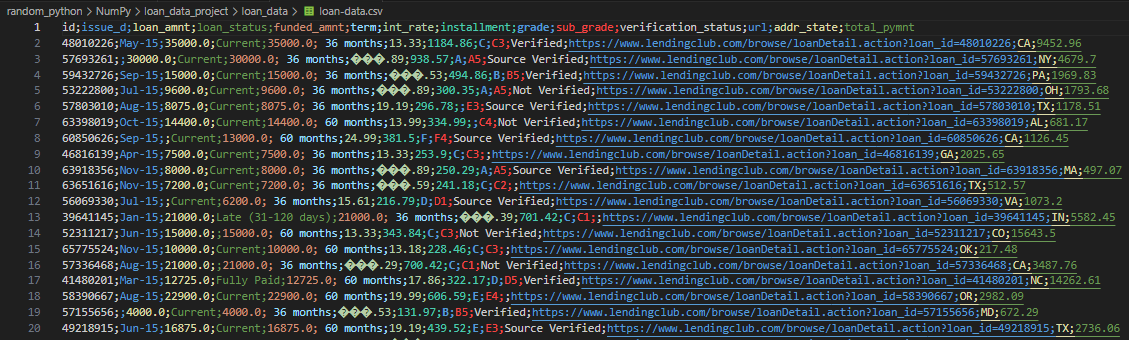

# Imports
* np.set_printoptions
    * suppress = True - No scientific notation
    * linewidth = 100 - limits output
    * precision = 2 - Only 2 digits after decimal point


In [2]:
import numpy as np
np.set_printoptions(suppress = True, linewidth = 100, precision = 2)

# Importing data

In [3]:
loan_data = np.genfromtxt("loan_data/loan-data.csv",
                          delimiter = ";",
                          skip_header = 1,
                          autostrip = True)
loan_data

array([[48010226.  ,         nan,    35000.  , ...,         nan,         nan,     9452.96],
       [57693261.  ,         nan,    30000.  , ...,         nan,         nan,     4679.7 ],
       [59432726.  ,         nan,    15000.  , ...,         nan,         nan,     1969.83],
       ...,
       [50415990.  ,         nan,    10000.  , ...,         nan,         nan,     2185.64],
       [46154151.  ,         nan,         nan, ...,         nan,         nan,     3199.4 ],
       [66055249.  ,         nan,    10000.  , ...,         nan,         nan,      301.9 ]])

In [4]:
# How many nan values?
np.isnan(loan_data).sum()

88005

In [5]:
# Temp fill max + 1
temporary_fill = np.nanmax(loan_data) + 1
# Temp mean for each column
temporary_mean = np.nanmean(loan_data, axis = 0)

C:\Users\Palmg\AppData\Local\Temp\ipykernel_12372\1873354543.py:4: RuntimeWarning: Mean of empty slice
  temporary_mean = np.nanmean(loan_data, axis = 0)


"C:\Users\Palmg\AppData\Local\Temp\ipykernel_20028\1873354543.py:4: RuntimeWarning: Mean of empty slice
  temporary_mean = np.nanmean(loan_data, axis = 0)"

* Previous error message warns us that there is at least 1 column full of NaNs and now we have at least 1 NaN column in our temporary_mean array

In [6]:
temporary_mean

array([54015809.19,         nan,    15273.46,         nan,    15311.04,         nan,       16.62,
            440.92,         nan,         nan,         nan,         nan,         nan,     3143.85])

* 8 columns of nan in total, so 8 columns that only store strings

In [7]:
# 1st row = minimums of each column
# 2nd row = means of each column
# 3rd row = maximums of each column
temp_stats = np.array([np.nanmin(loan_data, axis = 0), temporary_mean, np.nanmax(loan_data, axis = 0)])
temp_stats

C:\Users\Palmg\AppData\Local\Temp\ipykernel_12372\786455196.py:4: RuntimeWarning: All-NaN slice encountered
  temp_stats = np.array([np.nanmin(loan_data, axis = 0), temporary_mean, np.nanmax(loan_data, axis = 0)])


array([[  373332.  ,         nan,     1000.  ,         nan,     1000.  ,         nan,        6.  ,
              31.42,         nan,         nan,         nan,         nan,         nan,        0.  ],
       [54015809.19,         nan,    15273.46,         nan,    15311.04,         nan,       16.62,
             440.92,         nan,         nan,         nan,         nan,         nan,     3143.85],
       [68616519.  ,         nan,    35000.  ,         nan,    35000.  ,         nan,       28.99,
            1372.97,         nan,         nan,         nan,         nan,         nan,    41913.62]])

# Splitting the data

* loan_data_str - string dataset
* loan_data_num - numeric dataset

In [8]:
columns_strings = np.argwhere(np.isnan(temporary_mean)).squeeze()
columns_strings

array([ 1,  3,  5,  8,  9, 10, 11, 12], dtype=int64)

In [9]:
columns_numeric = np.argwhere(np.isnan(temporary_mean) == False).squeeze()
columns_numeric

array([ 0,  2,  4,  6,  7, 13], dtype=int64)

In [10]:
loan_data_str = np.genfromtxt("loan_data/loan-data.csv",
                              delimiter = ";",
                              skip_header = 1,
                              autostrip = True,
                              usecols=columns_strings,
                              dtype = str)
loan_data_str

array([['May-15', 'Current', '36 months', ..., 'Verified',
        'https://www.lendingclub.com/browse/loanDetail.action?loan_id=48010226', 'CA'],
       ['', 'Current', '36 months', ..., 'Source Verified',
        'https://www.lendingclub.com/browse/loanDetail.action?loan_id=57693261', 'NY'],
       ['Sep-15', 'Current', '36 months', ..., 'Verified',
        'https://www.lendingclub.com/browse/loanDetail.action?loan_id=59432726', 'PA'],
       ...,
       ['Jun-15', 'Current', '36 months', ..., 'Source Verified',
        'https://www.lendingclub.com/browse/loanDetail.action?loan_id=50415990', 'CA'],
       ['Apr-15', 'Current', '36 months', ..., 'Source Verified',
        'https://www.lendingclub.com/browse/loanDetail.action?loan_id=46154151', 'OH'],
       ['Dec-15', 'Current', '36 months', ..., '',
        'https://www.lendingclub.com/browse/loanDetail.action?loan_id=66055249', 'IL']],
      dtype='<U69')

In [11]:
loan_data_num = np.genfromtxt("loan_data/loan-data.csv",
                              delimiter = ";",
                              skip_header = 1,
                              autostrip = True,
                              usecols=columns_numeric,
                              filling_values=temporary_fill)
loan_data_num

array([[48010226.  ,    35000.  ,    35000.  ,       13.33,     1184.86,     9452.96],
       [57693261.  ,    30000.  ,    30000.  , 68616520.  ,      938.57,     4679.7 ],
       [59432726.  ,    15000.  ,    15000.  , 68616520.  ,      494.86,     1969.83],
       ...,
       [50415990.  ,    10000.  ,    10000.  , 68616520.  , 68616520.  ,     2185.64],
       [46154151.  , 68616520.  ,    10000.  ,       16.55,      354.3 ,     3199.4 ],
       [66055249.  ,    10000.  ,    10000.  , 68616520.  ,      309.97,      301.9 ]])

### Headers

* headers_str
* headers_num

In [12]:
headers = np.genfromtxt("loan_data/loan-data.csv",
                        delimiter = ";",
                        autostrip = True,
                        skip_footer = loan_data.shape[0],
                        dtype = str)
headers

array(['id', 'issue_d', 'loan_amnt', 'loan_status', 'funded_amnt', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'verification_status', 'url', 'addr_state',
       'total_pymnt'], dtype='<U19')

In [13]:
header_str, header_num = headers[columns_strings], headers[columns_numeric]
header_str

array(['issue_d', 'loan_status', 'term', 'grade', 'sub_grade', 'verification_status', 'url',
       'addr_state'], dtype='<U19')

In [14]:
header_num

array(['id', 'loan_amnt', 'funded_amnt', 'int_rate', 'installment', 'total_pymnt'], dtype='<U19')

# Creating checkpoints

In [15]:
def checkpoint(file_name, checkpoint_header, checkpoint_data):
    np.savez(file_name, header = checkpoint_header, data = checkpoint_data)
    checkpoint_variable = np.load(file_name + ".npz")
    return checkpoint_variable

In [16]:
checkpoint_test = checkpoint("checkpoint-test", header_str, loan_data_str)

In [17]:
checkpoint_test['header']

array(['issue_d', 'loan_status', 'term', 'grade', 'sub_grade', 'verification_status', 'url',
       'addr_state'], dtype='<U19')

In [18]:
checkpoint_test['data']

array([['May-15', 'Current', '36 months', ..., 'Verified',
        'https://www.lendingclub.com/browse/loanDetail.action?loan_id=48010226', 'CA'],
       ['', 'Current', '36 months', ..., 'Source Verified',
        'https://www.lendingclub.com/browse/loanDetail.action?loan_id=57693261', 'NY'],
       ['Sep-15', 'Current', '36 months', ..., 'Verified',
        'https://www.lendingclub.com/browse/loanDetail.action?loan_id=59432726', 'PA'],
       ...,
       ['Jun-15', 'Current', '36 months', ..., 'Source Verified',
        'https://www.lendingclub.com/browse/loanDetail.action?loan_id=50415990', 'CA'],
       ['Apr-15', 'Current', '36 months', ..., 'Source Verified',
        'https://www.lendingclub.com/browse/loanDetail.action?loan_id=46154151', 'OH'],
       ['Dec-15', 'Current', '36 months', ..., '',
        'https://www.lendingclub.com/browse/loanDetail.action?loan_id=66055249', 'IL']],
      dtype='<U69')

In [19]:
np.array_equal(checkpoint_test['data'], loan_data_str)

True

# Manipulating string columns

In [20]:
header_str

array(['issue_d', 'loan_status', 'term', 'grade', 'sub_grade', 'verification_status', 'url',
       'addr_state'], dtype='<U19')

##### Issue Date

* There were 13 unique dates, 1 empty and 15th of each month
* Turned all dates into months and then all months into numbers from 1-12
* empty = 0

In [21]:
header_str[0] = "issue_date"

In [22]:
loan_data_str[:,0]

array(['May-15', '', 'Sep-15', ..., 'Jun-15', 'Apr-15', 'Dec-15'], dtype='<U69')

In [23]:
np.unique(loan_data_str[:,0])

array(['', 'Apr-15', 'Aug-15', 'Dec-15', 'Feb-15', 'Jan-15', 'Jul-15', 'Jun-15', 'Mar-15',
       'May-15', 'Nov-15', 'Oct-15', 'Sep-15'], dtype='<U69')

In [24]:
loan_data_str[:,0] = np.chararray.strip(loan_data_str[:,0], "-15")
loan_data_str[:,0]


array(['May', '', 'Sep', ..., 'Jun', 'Apr', 'Dec'], dtype='<U69')

In [25]:
months = np.array(['', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

In [26]:
for i in range(13):
    loan_data_str[:,0] = np.where(loan_data_str[:,0] == months[i],
                                  i,
                                  loan_data_str[:,0])
loan_data_str[:,0]

array(['5', '0', '9', ..., '6', '4', '12'], dtype='<U69')

##### Loan Status

In [27]:
loan_data_str[:,1]

array(['Current', 'Current', 'Current', ..., 'Current', 'Current', 'Current'], dtype='<U69')

In [28]:
np.unique(loan_data_str[:,1])

array(['', 'Charged Off', 'Current', 'Default', 'Fully Paid', 'In Grace Period', 'Issued',
       'Late (16-30 days)', 'Late (31-120 days)'], dtype='<U69')

In [29]:
np.unique(loan_data_str[:,1]).size

9

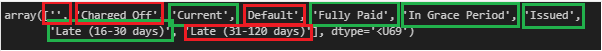

* Decided to split the loan statuses into good or bad

* Good: 
    * Current
    * Fully Paid
    * In Grace Period
    * Issued
    * Late (16-30 days)
* Bad:
    * empty
    * Charged Off
    * Default
    * Late (31-120 days)


In [30]:
# Good 1
# Bad 0

status_bad = np.array(['', 'Charged Off', 'Default', 'Late (31-120 days)'])
loan_data_str[:,1] = np.where(np.isin(loan_data_str[:,1], status_bad),0,1)
np.unique(loan_data_str[:,1], return_counts = True)

(array(['0', '1'], dtype='<U69'), array([ 687, 9313], dtype=int64))

* 687 Bads
* 9313 Goods

##### Term

In [31]:
header_str

array(['issue_date', 'loan_status', 'term', 'grade', 'sub_grade', 'verification_status', 'url',
       'addr_state'], dtype='<U19')

In [32]:
np.unique(loan_data_str[:,2], return_counts = True)

(array(['', '36 months', '60 months'], dtype='<U69'),
 array([ 500, 6281, 3219], dtype=int64))

In [33]:
loan_data_str[:,2] = np.chararray.strip(loan_data_str[:,2], " months")
loan_data_str[:,2]

array(['36', '36', '36', ..., '36', '36', '36'], dtype='<U69')

In [34]:
header_str[2] = "term_months"

In [35]:
# For the 500 empty values we assume the worst and set them to 60 (months)

loan_data_str[:,2] = np.where(loan_data_str[:,2] == '',
                              60,
                              loan_data_str[:,2])

In [36]:
np.unique(loan_data_str[:,2], return_counts = True)

(array(['36', '60'], dtype='<U69'), array([6281, 3719], dtype=int64))

* 36 - 6281
* 60 - 3719

##### Grade and Subgrade

In [37]:
header_str

array(['issue_date', 'loan_status', 'term_months', 'grade', 'sub_grade', 'verification_status',
       'url', 'addr_state'], dtype='<U19')

In [38]:
# Grade
loan_data_str[:,3]

array(['C', 'A', 'B', ..., 'A', 'D', 'A'], dtype='<U69')

In [39]:
np.unique(loan_data_str[:,3],  return_counts = True)

(array(['', 'A', 'B', 'C', 'D', 'E', 'F', 'G'], dtype='<U69'),
 array([ 515, 1632, 2606, 2766, 1389,  816,  236,   40], dtype=int64))

In [40]:
# Subgrade
loan_data_str[:,4]

array(['C3', 'A5', 'B5', ..., 'A5', 'D2', 'A4'], dtype='<U69')

In [41]:
np.unique(loan_data_str[:,4], return_counts = True)

(array(['', 'A1', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4',
        'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4',
        'F5', 'G1', 'G2', 'G3', 'G4', 'G5'], dtype='<U69'),
 array([514, 285, 278, 239, 323, 502, 509, 517, 530, 553, 494, 629, 567, 586, 564, 423, 391, 267,
        250, 255, 223, 235, 162, 171, 139, 114,  94,  52,  34,  43,  16,  19,  10,   3,   7,   2],
       dtype=int64))

In [42]:
# Assume worst grade in subgrades for all grades found in grades but not in subgrades.
# for example A -> A5

for i in np.unique(loan_data_str[:,3])[1:]: # Loop through A, B, C, D, E, F, G one at a time
    loan_data_str[:,4] = np.where((loan_data_str[:,4] == '') & (loan_data_str[:,3] == i),
                                  i + '5',
                                  loan_data_str[:,4])


In [43]:
np.unique(loan_data_str[:,4], return_counts = True)

(array(['', 'A1', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4',
        'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4',
        'F5', 'G1', 'G2', 'G3', 'G4', 'G5'], dtype='<U69'),
 array([  9, 285, 278, 239, 323, 592, 509, 517, 530, 553, 633, 629, 567, 586, 564, 577, 391, 267,
        250, 255, 288, 235, 162, 171, 139, 160,  94,  52,  34,  43,  24,  19,  10,   3,   7,   5],
       dtype=int64))

* Went from 514 empty strings to just 9 empty strings. Good progress
* Instead of removing the remaining 9, decided to make a new worst grade 'H1'

In [44]:
loan_data_str[:,4] = np.where(loan_data_str[:,4] == '',
                              'H1',
                              loan_data_str[:,4])

In [45]:
np.unique(loan_data_str[:,4], return_counts = True)

(array(['A1', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5',
        'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5',
        'G1', 'G2', 'G3', 'G4', 'G5', 'H1'], dtype='<U69'),
 array([285, 278, 239, 323, 592, 509, 517, 530, 553, 633, 629, 567, 586, 564, 577, 391, 267, 250,
        255, 288, 235, 162, 171, 139, 160,  94,  52,  34,  43,  24,  19,  10,   3,   7,   5,   9],
       dtype=int64))

##### Removing Grade
* Our subgrades is complete and includes the "upper"grades so we don't need it anymore.

In [46]:

loan_data_str = np.delete(loan_data_str, 3, axis = 1)

In [47]:
# What used to be grades is now subgrades in index 3
loan_data_str[:,3]

array(['C3', 'A5', 'B5', ..., 'A5', 'D2', 'A4'], dtype='<U69')

In [48]:
# Also remove grades from headers_str
header_str = np.delete(header_str, 3)


In [49]:
header_str

array(['issue_date', 'loan_status', 'term_months', 'sub_grade', 'verification_status', 'url',
       'addr_state'], dtype='<U19')

##### Converting Subgrade

* We make a dictionary where each subgrade(key) corresponds a number(value) from 1-36 (36 subgrades in total)

In [50]:
np.unique(loan_data_str[:,3]).size

36

In [51]:
keys = list(np.unique(loan_data_str[:,3]))
values = list(range(1, np.unique(loan_data_str[:,3]).shape[0] + 1))
print(keys)
print(values)


['A1', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5', 'H1']
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36]


In [52]:
dict_sub_grade = dict(zip(keys, values))
dict_sub_grade

{'A1': 1,
 'A2': 2,
 'A3': 3,
 'A4': 4,
 'A5': 5,
 'B1': 6,
 'B2': 7,
 'B3': 8,
 'B4': 9,
 'B5': 10,
 'C1': 11,
 'C2': 12,
 'C3': 13,
 'C4': 14,
 'C5': 15,
 'D1': 16,
 'D2': 17,
 'D3': 18,
 'D4': 19,
 'D5': 20,
 'E1': 21,
 'E2': 22,
 'E3': 23,
 'E4': 24,
 'E5': 25,
 'F1': 26,
 'F2': 27,
 'F3': 28,
 'F4': 29,
 'F5': 30,
 'G1': 31,
 'G2': 32,
 'G3': 33,
 'G4': 34,
 'G5': 35,
 'H1': 36}

In [53]:
# Convert subgrades to numerical
# Go through each subgrade 'A1', 'A2'....
# Go through the whole array and replace each subgrade with its value from dict (1-36)
for i in np.unique(loan_data_str[:,3]):
    loan_data_str[:,3] = np.where(loan_data_str[:,3] == i,
                                  dict_sub_grade[i],
                                  loan_data_str[:,3])

In [54]:
np.unique(loan_data_str[:,3], return_counts = True)

(array(['1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2', '20', '21', '22',
        '23', '24', '25', '26', '27', '28', '29', '3', '30', '31', '32', '33', '34', '35', '36',
        '4', '5', '6', '7', '8', '9'], dtype='<U69'),
 array([285, 633, 629, 567, 586, 564, 577, 391, 267, 250, 255, 278, 288, 235, 162, 171, 139, 160,
         94,  52,  34,  43, 239,  24,  19,  10,   3,   7,   5,   9, 323, 592, 509, 517, 530, 553],
       dtype=int64))

##### Verification Status

* Split into two

* Good
    * Source Verified
    * Verified
* Bad
    * Empty
    * Not Verified

In [55]:
header_str

array(['issue_date', 'loan_status', 'term_months', 'sub_grade', 'verification_status', 'url',
       'addr_state'], dtype='<U19')

In [56]:
np.unique(loan_data_str[:,4], return_counts = True)

(array(['', 'Not Verified', 'Source Verified', 'Verified'], dtype='<U69'),
 array([ 500, 2673, 4116, 2711], dtype=int64))

In [57]:
loan_data_str[:,4] = np.where((loan_data_str[:,4] == '') | (loan_data_str[:,4] == 'Not Verified'),
                               0,
                               1)

In [58]:
np.unique(loan_data_str[:,4], return_counts = True)

(array(['0', '1'], dtype='<U69'), array([3173, 6827], dtype=int64))

##### URL

In [59]:
loan_data_str[:,5]

array(['https://www.lendingclub.com/browse/loanDetail.action?loan_id=48010226',
       'https://www.lendingclub.com/browse/loanDetail.action?loan_id=57693261',
       'https://www.lendingclub.com/browse/loanDetail.action?loan_id=59432726', ...,
       'https://www.lendingclub.com/browse/loanDetail.action?loan_id=50415990',
       'https://www.lendingclub.com/browse/loanDetail.action?loan_id=46154151',
       'https://www.lendingclub.com/browse/loanDetail.action?loan_id=66055249'], dtype='<U69')

In [60]:
np.unique(loan_data_str[:,5],return_counts = True)

(array(['https://www.lendingclub.com/browse/loanDetail.action?loan_id=12606806',
        'https://www.lendingclub.com/browse/loanDetail.action?loan_id=13026045',
        'https://www.lendingclub.com/browse/loanDetail.action?loan_id=1312426', ...,
        'https://www.lendingclub.com/browse/loanDetail.action?loan_id=8138291',
        'https://www.lendingclub.com/browse/loanDetail.action?loan_id=8214572',
        'https://www.lendingclub.com/browse/loanDetail.action?loan_id=849994'], dtype='<U69'),
 array([1, 1, 1, ..., 1, 1, 1], dtype=int64))

In [61]:
np.chararray.strip(loan_data_str[:,5], "https://www.lendingclub.com/browse/loanDetail.action?loan_id=")

chararray(['48010226', '57693261', '59432726', ..., '50415990', '46154151', '66055249'],
          dtype='<U69')

In [62]:
loan_data_str[:,5] = np.chararray.strip(loan_data_str[:,5], "https://www.lendingclub.com/browse/loanDetail.action?loan_id=")

In [63]:
headers

array(['id', 'issue_d', 'loan_amnt', 'loan_status', 'funded_amnt', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'verification_status', 'url', 'addr_state',
       'total_pymnt'], dtype='<U19')

* Looks like id in the URL == id in the array

In [64]:
loan_data_str[:,5]

array(['48010226', '57693261', '59432726', ..., '50415990', '46154151', '66055249'], dtype='<U69')

In [65]:
loan_data_num[:,0]

array([48010226., 57693261., 59432726., ..., 50415990., 46154151., 66055249.])

In [66]:
np.array_equal(loan_data_str[:,5].astype(dtype = np.int32), loan_data_num[:,0].astype(dtype = np.int32))

True

------> Get rid of URL column

In [67]:
loan_data_str = np.delete(loan_data_str, 5, axis = 1)
header_str = np.delete(header_str, 5)

In [68]:
loan_data_str[:,5]

array(['CA', 'NY', 'PA', ..., 'CA', 'OH', 'IL'], dtype='<U69')

##### State Address

In [69]:
np.unique(loan_data_str[:,5], return_counts = True)

(array(['', 'AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA', 'HI', 'IL', 'IN',
        'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH',
        'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VA',
        'VT', 'WA', 'WI', 'WV', 'WY'], dtype='<U69'),
 array([ 500,   26,  119,   74,  220, 1336,  201,  143,   27,   27,  690,  321,   44,  389,  152,
          84,   84,  116,  210,  222,   10,  267,  156,  160,   61,   28,  261,   16,   25,   58,
         341,   57,  130,  777,  312,   83,  108,  320,   40,  107,   24,  143,  758,   74,  242,
          17,  216,  148,   49,   27], dtype=int64))

In [70]:
header_str

array(['issue_date', 'loan_status', 'term_months', 'sub_grade', 'verification_status',
       'addr_state'], dtype='<U19')

In [71]:
header_str[5] = "state_address"

In [72]:
# Split names and counts
states_names, states_count = np.unique(loan_data_str[:,5], return_counts = True)

In [73]:
# Indices for sorted array descending
states_count_sorted = np.argsort(-states_count)

In [74]:
states_names[states_count_sorted], states_count[states_count_sorted]

(array(['CA', 'NY', 'TX', 'FL', '', 'IL', 'NJ', 'GA', 'PA', 'OH', 'MI', 'NC', 'VA', 'MD', 'AZ',
        'WA', 'MA', 'CO', 'MO', 'MN', 'IN', 'WI', 'CT', 'TN', 'NV', 'AL', 'LA', 'OR', 'SC', 'KY',
        'KS', 'OK', 'UT', 'AR', 'MS', 'NH', 'NM', 'WV', 'HI', 'RI', 'MT', 'DE', 'DC', 'WY', 'AK',
        'NE', 'SD', 'VT', 'ND', 'ME'], dtype='<U69'),
 array([1336,  777,  758,  690,  500,  389,  341,  321,  320,  312,  267,  261,  242,  222,  220,
         216,  210,  201,  160,  156,  152,  148,  143,  143,  130,  119,  116,  108,  107,   84,
          84,   83,   74,   74,   61,   58,   57,   49,   44,   40,   28,   27,   27,   27,   26,
          25,   24,   17,   16,   10], dtype=int64))

In [75]:
# Fill emptys with zeros
loan_data_str[:,5] = np.where(loan_data_str[:,5] == '',
                              0,
                              loan_data_str[:,5])

In [76]:
# 4 arrays based on state region
states_west = np.array(['WA','OR','CA','NV','ID','MT','WY','UT','CO', 'AZ','NM','HI', 'AK'])
states_south = np.array(['TX', 'OK', 'AR', 'LA', 'MS', 'AL', 'TN', 'KY', 'FL', 'GA', 'SC', 'NC', 'VA', 'WV', 'MD', 'DE', 'DC'])
states_midwest = np.array(['ND', 'SD', 'NE', 'KS', 'MN', 'IA', 'MO', 'WI', 'IL', 'IN', 'MI', 'OH'])
states_east = np.array(['PA', 'NY', 'NJ', 'CT', 'MA', 'VT', 'NH', 'ME', 'RI']) 
                      

In [77]:
# WEST = 1
# SOUTH = 2
# MIDWEST = 3
# EAST = 4

loan_data_str[:,5] = np.where(np.isin(loan_data_str[:,5], states_west),
                              1,
                              loan_data_str[:,5])

loan_data_str[:,5] = np.where(np.isin(loan_data_str[:,5], states_south),
                              2,
                              loan_data_str[:,5])

loan_data_str[:,5] = np.where(np.isin(loan_data_str[:,5], states_midwest),
                              3,
                              loan_data_str[:,5])

loan_data_str[:,5] = np.where(np.isin(loan_data_str[:,5], states_east),
                              4,
                              loan_data_str[:,5])

In [78]:
np.unique(loan_data_str[:,5], return_counts = True)

(array(['0', '1', '2', '3', '4'], dtype='<U69'),
 array([ 500, 2467, 3384, 1733, 1916], dtype=int64))

##### Converting str array to numerical

In [79]:
loan_data_str

array([['5', '1', '36', '13', '1', '1'],
       ['0', '1', '36', '5', '1', '4'],
       ['9', '1', '36', '10', '1', '4'],
       ...,
       ['6', '1', '36', '5', '1', '1'],
       ['4', '1', '36', '17', '1', '3'],
       ['12', '1', '36', '4', '0', '3']], dtype='<U69')

In [80]:
loan_data_str = loan_data_str.astype(np.int32)

In [81]:
loan_data_str

array([[ 5,  1, 36, 13,  1,  1],
       [ 0,  1, 36,  5,  1,  4],
       [ 9,  1, 36, 10,  1,  4],
       ...,
       [ 6,  1, 36,  5,  1,  1],
       [ 4,  1, 36, 17,  1,  3],
       [12,  1, 36,  4,  0,  3]])

##### Checkpoint 1

In [82]:
checkpoint_strings = checkpoint("Checkpoint-Strings", header_str, loan_data_str)

In [83]:
checkpoint_strings["header"]

array(['issue_date', 'loan_status', 'term_months', 'sub_grade', 'verification_status',
       'state_address'], dtype='<U19')

In [84]:
checkpoint_strings["data"]

array([[ 5,  1, 36, 13,  1,  1],
       [ 0,  1, 36,  5,  1,  4],
       [ 9,  1, 36, 10,  1,  4],
       ...,
       [ 6,  1, 36,  5,  1,  1],
       [ 4,  1, 36, 17,  1,  3],
       [12,  1, 36,  4,  0,  3]])

# Numeric

In [85]:
loan_data_num

array([[48010226.  ,    35000.  ,    35000.  ,       13.33,     1184.86,     9452.96],
       [57693261.  ,    30000.  ,    30000.  , 68616520.  ,      938.57,     4679.7 ],
       [59432726.  ,    15000.  ,    15000.  , 68616520.  ,      494.86,     1969.83],
       ...,
       [50415990.  ,    10000.  ,    10000.  , 68616520.  , 68616520.  ,     2185.64],
       [46154151.  , 68616520.  ,    10000.  ,       16.55,      354.3 ,     3199.4 ],
       [66055249.  ,    10000.  ,    10000.  , 68616520.  ,      309.97,      301.9 ]])

In [86]:
np.isnan(loan_data_num).sum()

0

##### Substitute fillers

* We filled all NaNs with temporary_value of max() + 1

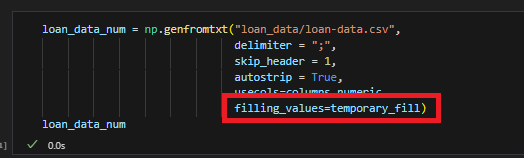 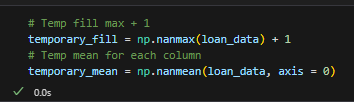

In [87]:
header_num

array(['id', 'loan_amnt', 'funded_amnt', 'int_rate', 'installment', 'total_pymnt'], dtype='<U19')

##### ID

In [88]:
temporary_fill

68616520.0

In [89]:
np.isin(loan_data_num[:,0], temporary_fill).sum()

0

##### Temporary stats

In [90]:
columns_numeric

array([ 0,  2,  4,  6,  7, 13], dtype=int64)

In [91]:
header_num

array(['id', 'loan_amnt', 'funded_amnt', 'int_rate', 'installment', 'total_pymnt'], dtype='<U19')

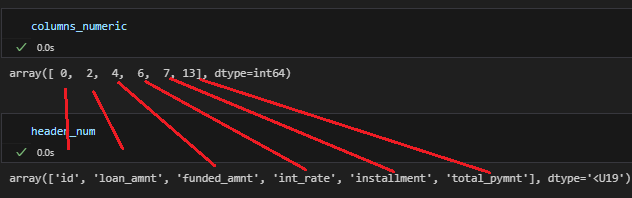

In [92]:
# Our temp stats also has the string columns
# To get rid of these we use the columns_numeric in the next cell
temp_stats

array([[  373332.  ,         nan,     1000.  ,         nan,     1000.  ,         nan,        6.  ,
              31.42,         nan,         nan,         nan,         nan,         nan,        0.  ],
       [54015809.19,         nan,    15273.46,         nan,    15311.04,         nan,       16.62,
             440.92,         nan,         nan,         nan,         nan,         nan,     3143.85],
       [68616519.  ,         nan,    35000.  ,         nan,    35000.  ,         nan,       28.99,
            1372.97,         nan,         nan,         nan,         nan,         nan,    41913.62]])

In [93]:
# min() - row 0
# mean() - row 1
# max() - row 2
# For each column
temp_stats[:, columns_numeric]

array([[  373332.  ,     1000.  ,     1000.  ,        6.  ,       31.42,        0.  ],
       [54015809.19,    15273.46,    15311.04,       16.62,      440.92,     3143.85],
       [68616519.  ,    35000.  ,    35000.  ,       28.99,     1372.97,    41913.62]])

##### Funded amount

* Assume worst, so we use minimum

In [94]:
loan_data_num[:,2]

array([35000., 30000., 15000., ..., 10000., 10000., 10000.])

In [95]:
loan_data_num[:,2] = np.where(loan_data_num[:,2] == temporary_fill,
                              temp_stats[0, columns_numeric[2]],
                              loan_data_num[:,2])
loan_data_num[:,2]

array([35000., 30000., 15000., ..., 10000., 10000., 10000.])

##### Loaned amount, Interest Rate, Installment, Total Payment 

* Assume worst, so we use maximum here
* Indices are 1,3,4,5

In [96]:
header_num


array(['id', 'loan_amnt', 'funded_amnt', 'int_rate', 'installment', 'total_pymnt'], dtype='<U19')

In [97]:
for i in [1,3,4,5]:
    loan_data_num[:,i] = np.where(loan_data_num[:,i] == temporary_fill,
                                  temp_stats[2, columns_numeric[i]],
                                  loan_data_num[:,i])


In [98]:
loan_data_num

array([[48010226.  ,    35000.  ,    35000.  ,       13.33,     1184.86,     9452.96],
       [57693261.  ,    30000.  ,    30000.  ,       28.99,      938.57,     4679.7 ],
       [59432726.  ,    15000.  ,    15000.  ,       28.99,      494.86,     1969.83],
       ...,
       [50415990.  ,    10000.  ,    10000.  ,       28.99,     1372.97,     2185.64],
       [46154151.  ,    35000.  ,    10000.  ,       16.55,      354.3 ,     3199.4 ],
       [66055249.  ,    10000.  ,    10000.  ,       28.99,      309.97,      301.9 ]])

In [99]:
np.isin(loan_data_num, temporary_fill).sum()

0

# Currency Change

* The EUR-USD.csv file has all the monthly average exchange rates for year 2015.
* We also have issue_date in our data -> We can do the currency exchange for each month

In [100]:
header_str

array(['issue_date', 'loan_status', 'term_months', 'sub_grade', 'verification_status',
       'state_address'], dtype='<U19')

In [101]:
EUR_USD = np.genfromtxt('loan_data/EUR-USD.csv', delimiter = ",", autostrip= True, dtype = str)
EUR_USD

array([['Open', 'High', 'Low', 'Close', 'Volume'],
       ['1.2098628282546997', '1.2098628282546997', '1.11055588722229', '1.1287955045700073', '0'],
       ['1.1287955045700073', '1.1484194993972778', '1.117680549621582', '1.1205360889434814',
        '0'],
       ['1.119795799255371', '1.1240400075912476', '1.0460032224655151', '1.0830246210098267',
        '0'],
       ['1.0741022825241089', '1.1247594356536865', '1.0521597862243652', '1.1114321947097778',
        '0'],
       ['1.1215037107467651', '1.145304799079895', '1.0821995735168457', '1.0960345268249512',
        '0'],
       ['1.095902442932129', '1.1428401470184326', '1.0888904333114624', '1.122296690940857', '0'],
       ['1.1134989261627197', '1.1219995021820068', '1.081270456314087', '1.0939244031906128',
        '0'],
       ['1.0969001054763794', '1.1705996990203857', '1.0850305557250977', '1.1340054273605347',
        '0'],
       ['1.1225990056991577', '1.1460003852844238', '1.1089695692062378', '1.1255937814712524

In [102]:
# We will use the closing price
EUR_USD = np.genfromtxt('loan_data/EUR-USD.csv',
                        delimiter = ",",
                        autostrip= True,
                        skip_header = 1,
                        usecols=3)
EUR_USD


array([1.13, 1.12, 1.08, 1.11, 1.1 , 1.12, 1.09, 1.13, 1.13, 1.1 , 1.06, 1.09])

In [103]:
exchange_rate = loan_data_str[:,0] # issue_dates in numbers 0-12 | 0 = empty | 1 = January .... 12 = December

for i in range(1,13):
    exchange_rate = np.where(exchange_rate == i,
                             EUR_USD[i-1],
                             exchange_rate)

# Empty issue_dates are replaced with the mean() of EUR_USD
exchange_rate = np.where(exchange_rate == 0,
                        np.mean(EUR_USD),
                        exchange_rate)

In [104]:
np.unique(loan_data_str[:,0])

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [105]:
exchange_rate.shape

(10000,)

In [106]:
loan_data_num.shape

(10000, 6)

In [107]:
exchange_rate = np.reshape(exchange_rate, (10000,1))
exchange_rate.shape

(10000, 1)

In [108]:
# Horizontal stack - Add exchange rate as a new column at the end of loan_data_num
loan_data_num = np.hstack((loan_data_num, exchange_rate))
loan_data_num

array([[48010226.  ,    35000.  ,    35000.  , ...,     1184.86,     9452.96,        1.1 ],
       [57693261.  ,    30000.  ,    30000.  , ...,      938.57,     4679.7 ,        1.11],
       [59432726.  ,    15000.  ,    15000.  , ...,      494.86,     1969.83,        1.13],
       ...,
       [50415990.  ,    10000.  ,    10000.  , ...,     1372.97,     2185.64,        1.12],
       [46154151.  ,    35000.  ,    10000.  , ...,      354.3 ,     3199.4 ,        1.11],
       [66055249.  ,    10000.  ,    10000.  , ...,      309.97,      301.9 ,        1.09]])

In [109]:
header_num = np.concatenate((header_num,np.array(['exchange_rate'])))
header_num

array(['id', 'loan_amnt', 'funded_amnt', 'int_rate', 'installment', 'total_pymnt', 'exchange_rate'],
      dtype='<U19')

##### USD to EUR

In [110]:
header_num

array(['id', 'loan_amnt', 'funded_amnt', 'int_rate', 'installment', 'total_pymnt', 'exchange_rate'],
      dtype='<U19')

In [111]:
# loan_amnt, funded_amnt, installment, total_pymnt
columns_usd = np.array([1,2,4,5])

In [112]:
loan_data_num[:,[columns_usd]]

array([[[35000.  , 35000.  ,  1184.86,  9452.96]],

       [[30000.  , 30000.  ,   938.57,  4679.7 ]],

       [[15000.  , 15000.  ,   494.86,  1969.83]],

       ...,

       [[10000.  , 10000.  ,  1372.97,  2185.64]],

       [[35000.  , 10000.  ,   354.3 ,  3199.4 ]],

       [[10000.  , 10000.  ,   309.97,   301.9 ]]])

In [113]:
# For i in each column
# horizontal stack new columns with each value divided by exchange rate
for i in columns_usd:
    loan_data_num = np.hstack((loan_data_num, np.reshape(loan_data_num[:,1] / loan_data_num[:,6], (10000,1))))

In [114]:
loan_data_num.shape

(10000, 11)

In [115]:
loan_data_num

array([[48010226.  ,    35000.  ,    35000.  , ...,    31933.3 ,    31933.3 ,    31933.3 ],
       [57693261.  ,    30000.  ,    30000.  , ...,    27132.46,    27132.46,    27132.46],
       [59432726.  ,    15000.  ,    15000.  , ...,    13326.3 ,    13326.3 ,    13326.3 ],
       ...,
       [50415990.  ,    10000.  ,    10000.  , ...,     8910.3 ,     8910.3 ,     8910.3 ],
       [46154151.  ,    35000.  ,    10000.  , ...,    31490.9 ,    31490.9 ,    31490.9 ],
       [66055249.  ,    10000.  ,    10000.  , ...,     9145.8 ,     9145.8 ,     9145.8 ]])

##### Expanding the header

In [116]:
# EUR headers
header_expand = np.array([column_name + '_EUR' for column_name in header_num[columns_usd]])

In [117]:
header_expand

array(['loan_amnt_EUR', 'funded_amnt_EUR', 'installment_EUR', 'total_pymnt_EUR'], dtype='<U15')

In [118]:
header_num = np.concatenate((header_num, header_expand))
header_num

array(['id', 'loan_amnt', 'funded_amnt', 'int_rate', 'installment', 'total_pymnt', 'exchange_rate',
       'loan_amnt_EUR', 'funded_amnt_EUR', 'installment_EUR', 'total_pymnt_EUR'], dtype='<U19')

In [119]:
# USD headers
header_num[columns_usd]= np.array([column_name + '_USD' for column_name in header_num[columns_usd]])

In [120]:
# Final 
header_num

array(['id', 'loan_amnt_USD', 'funded_amnt_USD', 'int_rate', 'installment_USD', 'total_pymnt_USD',
       'exchange_rate', 'loan_amnt_EUR', 'funded_amnt_EUR', 'installment_EUR', 'total_pymnt_EUR'],
      dtype='<U19')

In [121]:
# Change the order so that USD/EUR counterparts are next to each other
columns_index_order = [0,1,7,2,8,3,4,9,5,10,6]

In [122]:
header_num = header_num[columns_index_order]
header_num

array(['id', 'loan_amnt_USD', 'loan_amnt_EUR', 'funded_amnt_USD', 'funded_amnt_EUR', 'int_rate',
       'installment_USD', 'installment_EUR', 'total_pymnt_USD', 'total_pymnt_EUR', 'exchange_rate'],
      dtype='<U19')

In [123]:
loan_data_num = loan_data_num[:,columns_index_order]
loan_data_num

array([[48010226.  ,    35000.  ,    31933.3 , ...,     9452.96,    31933.3 ,        1.1 ],
       [57693261.  ,    30000.  ,    27132.46, ...,     4679.7 ,    27132.46,        1.11],
       [59432726.  ,    15000.  ,    13326.3 , ...,     1969.83,    13326.3 ,        1.13],
       ...,
       [50415990.  ,    10000.  ,     8910.3 , ...,     2185.64,     8910.3 ,        1.12],
       [46154151.  ,    35000.  ,    31490.9 , ...,     3199.4 ,    31490.9 ,        1.11],
       [66055249.  ,    10000.  ,     9145.8 , ...,      301.9 ,     9145.8 ,        1.09]])

##### Interest rate

* Transform the interest rates between 0-1

In [124]:
loan_data_num[:,5]

array([13.33, 28.99, 28.99, ..., 28.99, 16.55, 28.99])

In [125]:
loan_data_num[:,5] = loan_data_num[:,5]/100
loan_data_num[:,5]

array([0.13, 0.29, 0.29, ..., 0.29, 0.17, 0.29])

##### Checkpoint 2

In [126]:
checkpoint_numeric = checkpoint("Checkpoint-Numeric", header_num, loan_data_num)

In [127]:
checkpoint_numeric['header'], checkpoint_numeric['data']

(array(['id', 'loan_amnt_USD', 'loan_amnt_EUR', 'funded_amnt_USD', 'funded_amnt_EUR', 'int_rate',
        'installment_USD', 'installment_EUR', 'total_pymnt_USD', 'total_pymnt_EUR', 'exchange_rate'],
       dtype='<U19'),
 array([[48010226.  ,    35000.  ,    31933.3 , ...,     9452.96,    31933.3 ,        1.1 ],
        [57693261.  ,    30000.  ,    27132.46, ...,     4679.7 ,    27132.46,        1.11],
        [59432726.  ,    15000.  ,    13326.3 , ...,     1969.83,    13326.3 ,        1.13],
        ...,
        [50415990.  ,    10000.  ,     8910.3 , ...,     2185.64,     8910.3 ,        1.12],
        [46154151.  ,    35000.  ,    31490.9 , ...,     3199.4 ,    31490.9 ,        1.11],
        [66055249.  ,    10000.  ,     9145.8 , ...,      301.9 ,     9145.8 ,        1.09]]))

# Creating the complete dataset

In [128]:
loan_data_str.shape, loan_data_num.shape

((10000, 6), (10000, 11))

In [131]:
# Horizontal stack
loan_data = np.hstack((checkpoint_numeric['data'], checkpoint_strings['data']))

In [132]:
np.isnan(loan_data).sum()

0

In [134]:
header_full = np.concatenate((checkpoint_numeric['header'],checkpoint_strings['header']))

##### Sorting

In [138]:
loan_data = loan_data[np.argsort(loan_data[:,0])]

In [139]:
loan_data

array([[  373332.  ,     9950.  ,     9038.08, ...,       21.  ,        0.  ,        1.  ],
       [  575239.  ,    12000.  ,    10900.2 , ...,       25.  ,        1.  ,        2.  ],
       [  707689.  ,    10000.  ,     8924.3 , ...,       13.  ,        1.  ,        0.  ],
       ...,
       [68614880.  ,     5600.  ,     5121.65, ...,        8.  ,        1.  ,        1.  ],
       [68615915.  ,     4000.  ,     3658.32, ...,       10.  ,        1.  ,        2.  ],
       [68616519.  ,    21600.  ,    19754.93, ...,        3.  ,        0.  ,        2.  ]])

In [142]:
# Other way to check sorting, argsort should return 0,1,2,...,9999
np.argsort(loan_data[:,0])

array([   0,    1,    2, ..., 9997, 9998, 9999], dtype=int64)

##### Storing the dataset

In [143]:
header_full

array(['id', 'loan_amnt_USD', 'loan_amnt_EUR', 'funded_amnt_USD', 'funded_amnt_EUR', 'int_rate',
       'installment_USD', 'installment_EUR', 'total_pymnt_USD', 'total_pymnt_EUR', 'exchange_rate',
       'issue_date', 'loan_status', 'term_months', 'sub_grade', 'verification_status',
       'state_address'], dtype='<U19')

In [146]:
# Stack header on top of data - vstack
loan_data = np.vstack((header_full, loan_data))
loan_data

array([['id', 'loan_amnt_USD', 'loan_amnt_EUR', ..., 'sub_grade', 'verification_status',
        'state_address'],
       ['id', 'loan_amnt_USD', 'loan_amnt_EUR', ..., 'sub_grade', 'verification_status',
        'state_address'],
       ['373332.0', '9950.0', '9038.082814338286', ..., '21.0', '0.0', '1.0'],
       ...,
       ['68614880.0', '5600.0', '5121.647851612413', ..., '8.0', '1.0', '1.0'],
       ['68615915.0', '4000.0', '3658.319894008867', ..., '10.0', '1.0', '2.0'],
       ['68616519.0', '21600.0', '19754.927427647883', ..., '3.0', '0.0', '2.0']], dtype='<U32')

In [147]:
np.savetxt("clean_data/loan_data_preprocessed.csv",
           loan_data,
           fmt = "%s",
           delimiter = ',')

# Amazing!

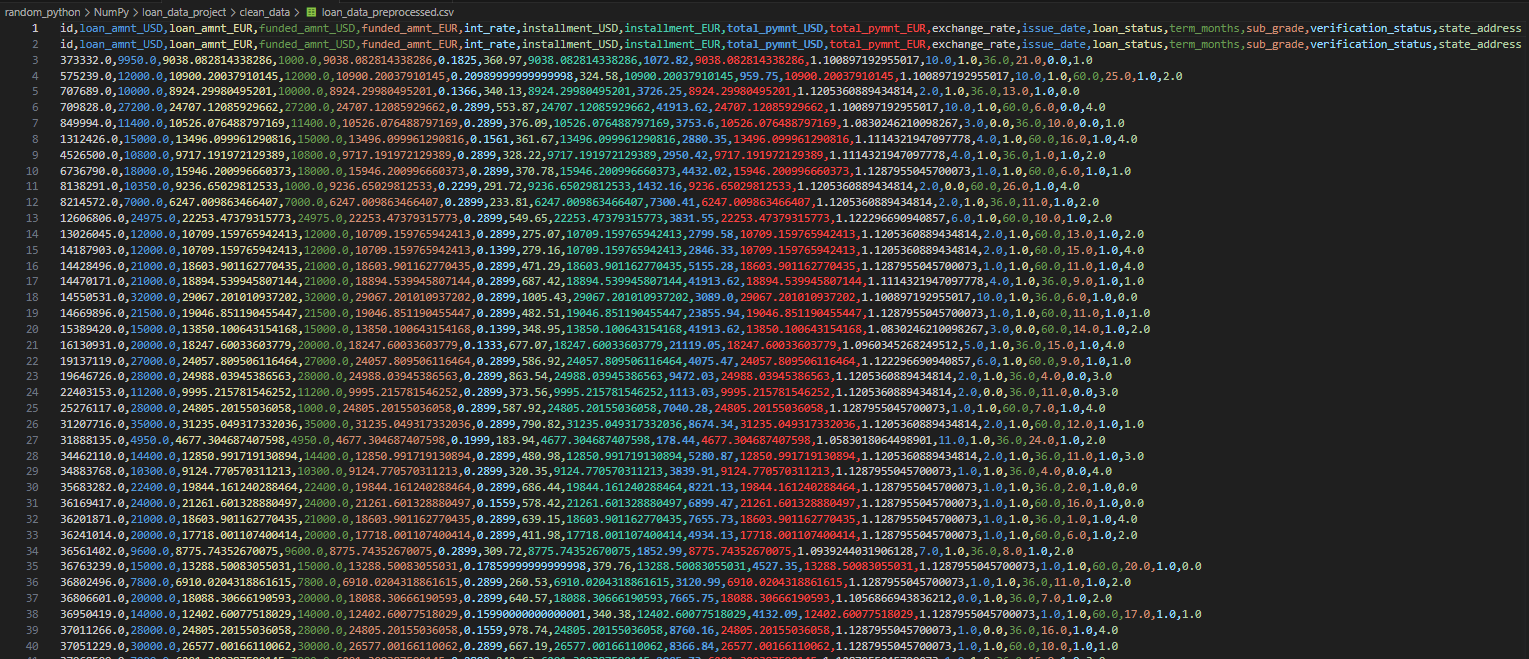